# Importing the Anvil server package and connect this notebook to web app using uplink key.

In [1]:
import anvil.server

In [2]:
anvil.server.connect("6DSCIZMEGKJFJ3LRFN3NOV2R-UM3R5T6O5JFJ2TQD")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


# Importing Libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [4]:
dataset=pd.read_csv('collegePlace.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [5]:
print(x)

[[22 'Male' 'Electronics And Communication' ... 8 1 1]
 [21 'Female' 'Computer Science' ... 7 1 1]
 [22 'Female' 'Information Technology' ... 6 0 0]
 ...
 [22 'Male' 'Information Technology' ... 7 0 0]
 [22 'Male' 'Computer Science' ... 7 0 0]
 [23 'Male' 'Civil' ... 8 0 0]]


In [6]:
print(y)

[1 1 1 ... 0 0 1]


In [7]:
dataset.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [8]:
dataset['Internships'].unique()

array([1, 0, 2, 3], dtype=int64)

In [9]:
dataset['HistoryOfBacklogs'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='PlacedOrNot', ylabel='count'>

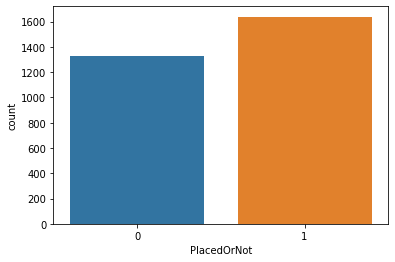

In [10]:
sns.countplot(data = dataset , x = 'PlacedOrNot')

<AxesSubplot:xlabel='Age', ylabel='CGPA'>

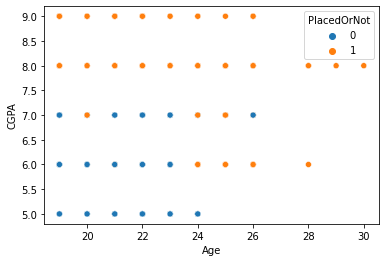

In [11]:
sns.scatterplot(data = dataset, x='Age' , y ='CGPA' , hue='PlacedOrNot')

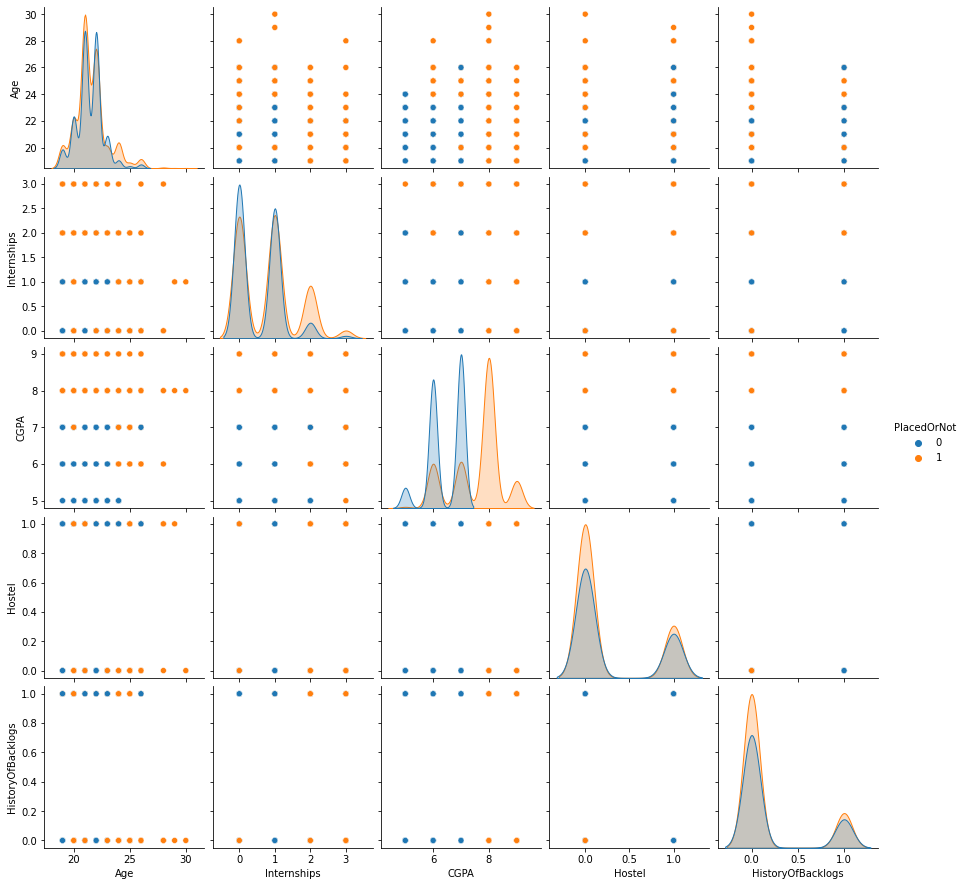

In [12]:
sns.pairplot(data = dataset , hue = 'PlacedOrNot')

# Data Pre-Processing

# Dataset Cleaning

In [13]:
dataset.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

# Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
le=LabelEncoder()
x[:,1]=le1.fit_transform(x[:,1])
x[:,2]=le2.fit_transform(x[:,2])

In [15]:
dataset.head(10)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
6,21,Male,Computer Science,0,7,0,1,0
7,21,Male,Information Technology,1,7,0,0,0
8,21,Male,Computer Science,2,6,0,0,1
9,21,Female,Computer Science,1,6,1,0,0


In [16]:
print(x)

[[22 1 3 ... 8 1 1]
 [21 0 1 ... 7 1 1]
 [22 0 4 ... 6 0 0]
 ...
 [22 1 4 ... 7 0 0]
 [22 1 1 ... 7 0 0]
 [23 1 0 ... 8 0 0]]


# Splitting Dataset into Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [19]:
print(scaled_x_train)

[[-0.37322846  0.44643786  0.85900901 ...  0.93659051 -0.61075025
  -0.48474651]
 [-1.1153954   0.44643786 -0.95267677 ...  0.93659051 -0.61075025
  -0.48474651]
 [ 1.11110542  0.44643786  0.25511375 ... -1.11876034 -0.61075025
  -0.48474651]
 ...
 [-0.37322846 -2.23995342 -0.34878151 ... -1.11876034 -0.61075025
  -0.48474651]
 [-0.37322846  0.44643786 -0.34878151 ...  0.93659051 -0.61075025
  -0.48474651]
 [-0.37322846  0.44643786 -0.34878151 ... -0.09108491  1.63733047
   2.06293388]]


# Training Dataset

In [20]:
from sklearn.metrics import plot_confusion_matrix , plot_roc_curve , plot_precision_recall_curve

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_model = LogisticRegression()
log_model.fit(scaled_x_train,Y_train)

LogisticRegression()

In [24]:
y_pred=log_model.predict(scaled_x_test)
cm=confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[293 106]
 [116 375]]


0.750561797752809

C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is dep

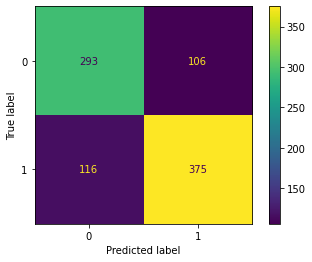

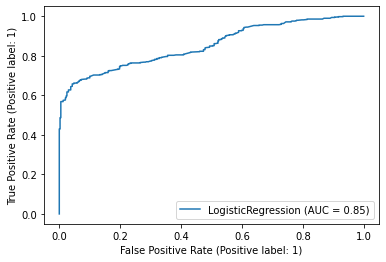

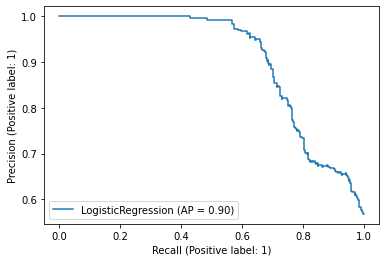

In [25]:
plot_confusion_matrix(log_model , scaled_x_test , Y_test)
plot_roc_curve(log_model , scaled_x_test , Y_test)
plot_precision_recall_curve(log_model , scaled_x_test , Y_test)

# KNN_Algorithm

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# Now we will make for loop to get the best K value : 
test_error_rate = []

for k in range (1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,Y_train)
    y_pred = knn_model.predict(scaled_x_test)
    error_rate = 1-accuracy_score(Y_test,y_pred)
    test_error_rate.append(error_rate)

Text(0.5, 1.0, 'Choose the best K value')

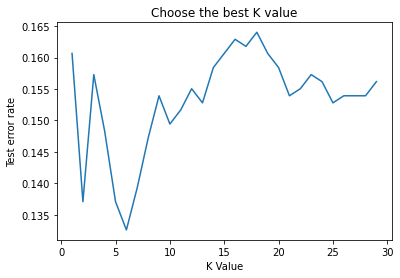

In [28]:
plt.plot(range(1,30),test_error_rate)
plt.xlabel('K Value')
plt.ylabel('Test error rate')
plt.title('Choose the best K value')

In [29]:
knn_model = KNeighborsClassifier(n_neighbors= 6)

In [30]:
knn_model = knn_model.fit(scaled_x_train,Y_train)

In [31]:
y_pred=knn_model.predict(scaled_x_test)
cm=confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[387  12]
 [106 385]]


0.8674157303370786

C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is dep

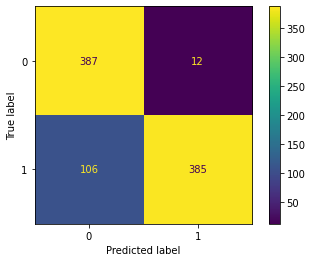

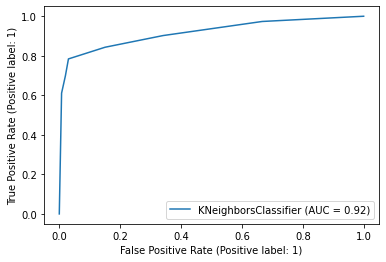

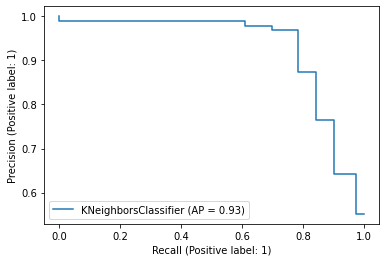

In [32]:
plot_confusion_matrix(knn_model , scaled_x_test , Y_test)
plot_roc_curve(knn_model , scaled_x_test , Y_test)
plot_precision_recall_curve(knn_model , scaled_x_test , Y_test)

# SVM ALGORITHM  

In [33]:
from sklearn.svm import SVC

In [34]:
svc = SVC()
param_grid = {'C':[0.001,0.01,0.1,1]}
from sklearn.model_selection import GridSearchCV

In [35]:
grid_model = GridSearchCV(svc,param_grid)

In [36]:
grid_model.fit(scaled_x_train,Y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.001, 0.01, 0.1, 1]})

In [37]:
grid_model.best_params_

{'C': 1}

In [38]:
y_pred=grid_model.predict(scaled_x_test)
cm=confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[372  27]
 [109 382]]


0.8471910112359551

C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is dep

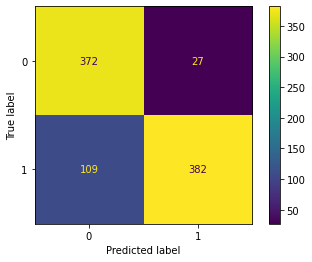

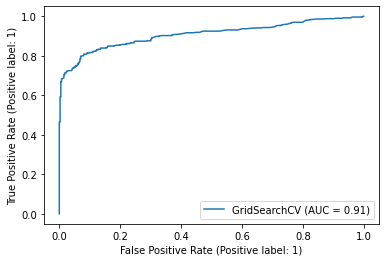

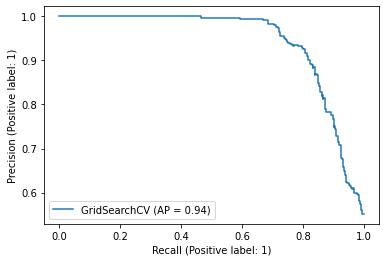

In [39]:
plot_confusion_matrix(grid_model , scaled_x_test , Y_test)
plot_roc_curve(grid_model , scaled_x_test , Y_test)
plot_precision_recall_curve(grid_model , scaled_x_test , Y_test)

# XGBoost 

In [40]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(scaled_x_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [41]:
y_pred=classifier.predict(scaled_x_test)
cm=confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[377  22]
 [ 78 413]]


0.8876404494382022

C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is dep

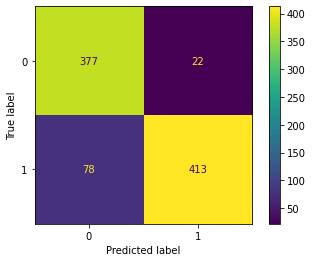

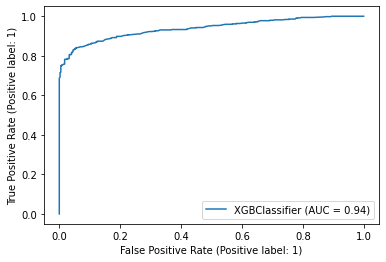

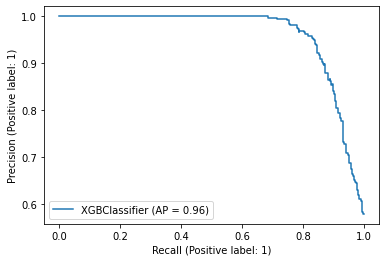

In [42]:
plot_confusion_matrix(classifier , scaled_x_test , Y_test)
plot_roc_curve(classifier , scaled_x_test , Y_test)
plot_precision_recall_curve(classifier , scaled_x_test , Y_test)

# Decision Treee

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(scaled_x_train,Y_train)

DecisionTreeClassifier()

In [44]:
y_pred=tree_model.predict(scaled_x_test)
cm=confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[375  24]
 [ 81 410]]


0.8820224719101124

C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is dep

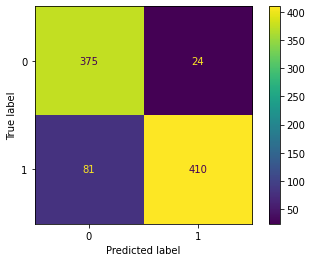

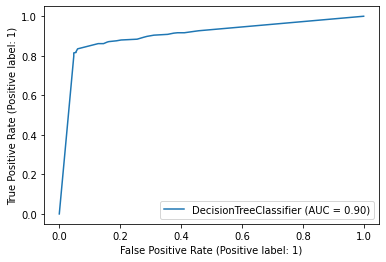

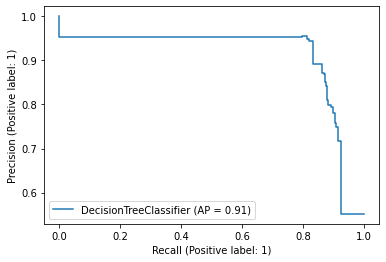

In [45]:
plot_confusion_matrix(tree_model , scaled_x_test , Y_test)
plot_roc_curve(tree_model , scaled_x_test , Y_test)
plot_precision_recall_curve(tree_model , scaled_x_test , Y_test)

# Single Prediction

In [46]:
result=classifier.predict(scaler.transform([[22,0,0,1,2,1,1]]))
if result==[1]:
  print('Person is Placed')
else:
  print('Person is not Placed')

Person is not Placed


#  we will create our prediction() with @anvil.server.callable decorator. The decerator makes the function callable from anvil app.

In [48]:
@anvil.server.callable
def prediction(age, gender, stream, internship, cgpa, hostel, HistoryOfBacklogs):
    out = classifier.predict(scaler.transform([[age, gender, stream, internship, cgpa, hostel, HistoryOfBacklogs]]))
    print(out)
    return out

[1]
[0]
